# This notebook explore the coorelation between TE up-regulation ( in SER / AD) and TE integration age
- to explore if the top-upregulated TEs are younger species
- 

In [5]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import os
import gc

In [6]:
from scipy import stats

# load data

In [7]:
logi = pd.read_csv("./OUTPUT_EXPLAIN.csv", header = 0, index_col = 0 )

In [8]:
logi.columns

Index(['count_table_indiv.csv', 'count_table_subF.csv', 'mm39_rmsk_full.tsv',
       'Deseq_indiv_locus_results.csv', 'genoLoc_Deseq_indiv_locus_result.csv',
       'compare_dTE_overlap/', 'genoLoc_TCPS_Deseq_indiv_locus_result.csv',
       'TCPS_all_Deseq_indiv_locus.csv', 'resampled_TCPS_all_TE_indi.csv',
       'TCPS_seq_similarity_summary_df.csv',
       'squire_tjp2_mut_seq_similarity_summary_df.csv',
       'squire_tjp2_wt_seq_similarity_summary_df.csv',
       'squire_tjp2_total_seq_similarity_summary_df.csv',
       'mouse_human_combined_similarity_suammry_df.csv',
       'squire_tjp2_total_seq_similarity_grouped_repClass_summary_df.csv',
       'TCPS_total_seq_similarity_grouped_repClass_summary_df.csv',
       'squire_all_Deseq_indiv_locus.csv', 'resampled_squire_all_TE_indi.csv',
       'squire_total_seq_similarity_repClassGrped_rvcmp_summary_df.csv',
       'TCPS_total_seq_similarity_repClassGrped_rvcmp_summary_df.csv'],
      dtype='object')

In [10]:
print( logi['squire_all_Deseq_indiv_locus.csv'].loc['explain'] )

squire all indiv deseq table with genoLoc and other related annotation


In [15]:
logi['squire_all_Deseq_indiv_locus.csv']

nb_created                                                    9
nb_updated                                                  NaN
explain       squire all indiv deseq table with genoLoc and ...
Name: squire_all_Deseq_indiv_locus.csv, dtype: object

In [40]:
squire_indi = pd.read_csv("./squire_all_Deseq_indiv_locus.csv" , header = 0, index_col = 0 )

In [41]:
squire_indi.head()

,TE_ID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,element_type,TE_name,TE_index,repName,repFamily,repClass,genoName,genoStart,genoEnd,strand,df_index_repName,seqLen
11357,chr17|26318143|26318201|Tigger12:TcMar-Tigger:...,6.651258,-0.841285,0.716066,-1.174872,0.592771,1.0,TE,Tigger12:TcMar-Tigger:DNA,Tigger12:TcMar-Tigger:DNA_236,Tigger12,TcMar-Tigger,DNA,chr17,26318143,26318201,-,11357_Tigger12,58
6327,chr4|11817737|11817796|Tigger19b:TcMar-Tigger:...,10.586987,-0.203290,0.607192,-0.334804,0.929015,1.0,TE,Tigger19b:TcMar-Tigger:DNA,Tigger19b:TcMar-Tigger:DNA_288,Tigger19b,TcMar-Tigger,DNA,chr4,11817737,11817796,-,6327_Tigger19b,59
820,chr11|115913825|115913885|MamRTE1:RTE-BovB:LIN...,16.156902,-0.127513,0.402174,-0.317059,0.987502,1.0,TE,MamRTE1:RTE-BovB:LINE,MamRTE1:RTE-BovB:LINE_283,MamRTE1,RTE-BovB,LINE,chr11,115913825,115913885,+,820_MamRTE1,60
7777,"chr11|58498306|58498366|MTD:ERVL-MaLR:LTR|169|+,.",5.234425,0.899249,0.784343,1.146500,0.558834,1.0,TE,MTD:ERVL-MaLR:LTR,MTD:ERVL-MaLR:LTR_169,MTD,ERVL-MaLR,LTR,chr11,58498306,58498366,+,7777_MTD,60
9814,"chr10|126903390|126903452|ID4_v:ID:SINE|183|+,.",6.713422,0.503397,0.658301,0.764692,0.785880,1.0,TE,ID4_v:ID:SINE,ID4_v:ID:SINE_183,ID4_v,ID,SINE,chr10,126903390,126903452,+,9814_ID4_v,62


In [42]:
squire_indi.shape

(15235, 19)

In [43]:
squire_indi['genoName'] = squire_indi['genoName'].astype( str)
squire_indi['genoStart'] = squire_indi['genoStart'].astype( str)
squire_indi['genoEnd'] = squire_indi['genoEnd'].astype( str)

In [44]:
genoID = [ "_".join(squire_indi.loc[i, ["genoName", "genoStart", "genoEnd"]] ) for i in squire_indi.index ]

In [52]:
squire_indi['genoID'] = genoID

In [47]:
rmsk_df = pd.read_csv("./mm39_rmsk_full.tsv", header = 0, index_col= 0, delimiter='\t' )

In [16]:
rmsk_df.head()

,swScore,milliDiv,milliDel,milliIns,genoName,genoStart,genoEnd,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id
#bin,,,,,,,,,,,,,,,,
1,3777,194,105,11,chr1,8387806,8388657,-186765622,+,Lx2B2,LINE,L1,5997,7041,-8,7
1,595,269,47,47,chr1,41942994,41943142,-153211137,+,B3,SINE,B2,4,151,-65,6
1,1796,281,48,69,chr1,50331618,50332377,-144821902,-,Lx7,LINE,L1,-1163,6533,5801,7
1,5180,80,29,11,chr1,58720077,58721182,-136433097,+,L1MdV_III,LINE,L1,681,1770,-2002,8
2,1316,273,85,19,chr1,100663164,100663479,-94490800,+,MLTR14,LTR,ERV1,161,505,-38,1


In [18]:
rmsk_df.shape

(5320771, 16)

### map mm39 rmsk and squire deseq table

In [53]:
rmsk_df['genoStart'] = rmsk_df['genoStart'].astype( str)
rmsk_df['genoEnd'] = rmsk_df['genoEnd'].astype( str)
rmsk_df['genoName'] = rmsk_df['genoName'].astype( str)

In [62]:
rmsk_df.reset_index(inplace= True)

In [63]:
rmsk_df.head()

,#bin,swScore,milliDiv,milliDel,milliIns,genoName,genoStart,genoEnd,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id
0,1,3777,194,105,11,chr1,8387806,8388657,-186765622,+,Lx2B2,LINE,L1,5997,7041,-8,7
1,1,595,269,47,47,chr1,41942994,41943142,-153211137,+,B3,SINE,B2,4,151,-65,6
2,1,1796,281,48,69,chr1,50331618,50332377,-144821902,-,Lx7,LINE,L1,-1163,6533,5801,7
3,1,5180,80,29,11,chr1,58720077,58721182,-136433097,+,L1MdV_III,LINE,L1,681,1770,-2002,8
4,2,1316,273,85,19,chr1,100663164,100663479,-94490800,+,MLTR14,LTR,ERV1,161,505,-38,1


In [64]:
"_".join(rmsk_df.loc[0, ["genoName", "genoStart", "genoEnd"]] )

'chr1_8387806_8388657'

In [ ]:
rmsk_genoID = [ "_".join(rmsk_df.loc[i, ["genoName", "genoStart", "genoEnd"]] ) for i in rmsk_df.index ]

In [67]:
rmsk_genoID[0:10]

['chr1_8387806_8388657',
 'chr1_41942994_41943142',
 'chr1_50331618_50332377',
 'chr1_58720077_58721182',
 'chr1_100663164_100663479',
 'chr1_109051877_109052234',
 'chr1_117440146_117440529',
 'chr1_142606235_142606423',
 'chr1_176160665_176160805',
 'chr1_3145576_3147149']

In [68]:
assert( len(rmsk_genoID) == rmsk_df.shape[0] )

In [69]:
rmsk_df['genoID'] = rmsk_genoID

In [84]:
# check if we can find the exact map between rmsk and squire
rmsk_df[ (rmsk_df['repName'] == 'Tigger19b') & (rmsk_df['genoName'] == 'chr4')].head(10)
#11817737	11817796

,#bin,swScore,milliDiv,milliDel,milliIns,genoName,genoStart,genoEnd,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id,genoID
1031418,617,198,365,31,38,chr4,4290205,4290336,-152570350,+,Tigger19b,DNA,TcMar-Tigger,207,336,-214,2,chr4_4290205_4290336
1034062,630,199,243,163,80,chr4,5915686,5915798,-150944888,-,Tigger19b,DNA,TcMar-Tigger,-343,207,85,2,chr4_5915686_5915798
1034531,632,180,260,83,49,chr4,6201391,6201472,-150659214,+,Tigger19b,DNA,TcMar-Tigger,320,403,-147,2,chr4_6201391_6201472
1039550,654,342,281,185,31,chr4,9055365,9055556,-147805130,+,Tigger19b,DNA,TcMar-Tigger,206,432,-118,2,chr4_9055365_9055556
1043053,669,185,277,15,71,chr4,11033550,11033620,-145827066,+,Tigger19b,DNA,TcMar-Tigger,258,323,-227,2,chr4_11033550_11033620
1045332,675,189,288,78,0,chr4,11817737,11817796,-145042890,-,Tigger19b,DNA,TcMar-Tigger,-203,347,284,2,chr4_11817737_11817796
1046143,678,189,277,67,57,chr4,12269408,12269496,-144591190,+,Tigger19b,DNA,TcMar-Tigger,227,315,-235,2,chr4_12269408_12269496
1056768,727,196,222,137,60,chr4,18682728,18682795,-138177891,+,Tigger19b,DNA,TcMar-Tigger,320,392,-158,2,chr4_18682728_18682795
1057811,732,201,330,28,80,chr4,19330825,19330937,-137529749,-,Tigger19b,DNA,TcMar-Tigger,-175,375,270,2,chr4_19330825_19330937
1070147,787,181,211,136,0,chr4,26549772,26549810,-130310876,-,Tigger19b,DNA,TcMar-Tigger,-353,197,154,2,chr4_26549772_26549810


In [86]:
rmsk_subdf = rmsk_df[ np.isin(  rmsk_df['genoID'], squire_indi['genoID'] )] 

In [88]:
rmsk_subdf.head()

,#bin,swScore,milliDiv,milliDel,milliIns,genoName,genoStart,genoEnd,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id,genoID
201,107,469,302,51,91,chr1,36306690,36307064,-158847215,+,RLTR17B_Mm,LTR,ERVK,221,450,-352,5,chr1_36306690_36307064
255,123,2385,312,94,19,chr1,52953078,52954592,-142199687,+,L1_Mur3,LINE,L1,1336,2975,-2905,7,chr1_52953078_52954592
276,129,41888,18,6,1,chr1,58978002,58983314,-136170965,-,MERVL_2A-int,LTR,ERVL,-309,5452,1,8,chr1_58978002_58983314
3517,621,2185,145,79,3,chr1,4843772,4844146,-190310133,+,MTC,LTR,ERVL-MaLR,9,413,-8,2,chr1_4843772_4844146
3534,622,897,231,71,5,chr1,4850769,4850965,-190303314,+,B3,SINE,B2,6,215,-1,2,chr1_4850769_4850965


In [89]:
rmsk_subdf.shape

(15235, 18)

In [90]:
squire_indi.shape

(15235, 20)

## add swScore to deseq result

In [92]:
squire_indi['genoID'].duplicated().sum()

0

In [93]:
rmsk_subdf['genoID'].duplicated().sum()

0

In [94]:
rmsk_subdf.columns

Index(['#bin', 'swScore', 'milliDiv', 'milliDel', 'milliIns', 'genoName',
       'genoStart', 'genoEnd', 'genoLeft', 'strand', 'repName', 'repClass',
       'repFamily', 'repStart', 'repEnd', 'repLeft', 'id', 'genoID'],
      dtype='object')

In [95]:
score_map = dict( zip( rmsk_subdf['genoID'], rmsk_subdf['swScore'] ))

In [96]:
squire_indiv_score = [ score_map[k] for k in squire_indi['genoID'] ]

In [97]:
squire_indi['swScore'] = squire_indiv_score

## Association between SER-upregulation and swScore
- swScore: smith waterman alignment score. Higher alignment scores indicate greater similarity between the element and the reference / consensus TE
    + higher similarity score could indicates younger the integration age, because older sequences has more mutation and thus lower alignment rate

## try on significant TEs first
- too many elements for the full dTE table, slow mapping to swScore
- but too much loss of information if use significant TEs, so need to proceed with sub-sampled all TEs

In [98]:
squire_indi.head(2)

,TE_ID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,element_type,TE_name,TE_index,...,repFamily,repClass,genoName,genoStart,genoEnd,strand,df_index_repName,seqLen,genoID,swScore
11357,chr17|26318143|26318201|Tigger12:TcMar-Tigger:...,6.651258,-0.841285,0.716066,-1.174872,0.592771,1.0,TE,Tigger12:TcMar-Tigger:DNA,Tigger12:TcMar-Tigger:DNA_236,...,TcMar-Tigger,DNA,chr17,26318143,26318201,-,11357_Tigger12,58,chr17_26318143_26318201,229
6327,chr4|11817737|11817796|Tigger19b:TcMar-Tigger:...,10.586987,-0.203290,0.607192,-0.334804,0.929015,1.0,TE,Tigger19b:TcMar-Tigger:DNA,Tigger19b:TcMar-Tigger:DNA_288,...,TcMar-Tigger,DNA,chr4,11817737,11817796,-,6327_Tigger19b,59,chr4_11817737_11817796,189


In [99]:
squire_indi.shape

(15235, 21)

check if the stat is correlated with LFC and padj

In [100]:
squire_indi['-log(padj)'] = np.log10( squire_indi['padj']) * -1

/home/lucy/anaconda3/envs/qc_pipe/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='log2FoldChange', ylabel='-log(padj)'>

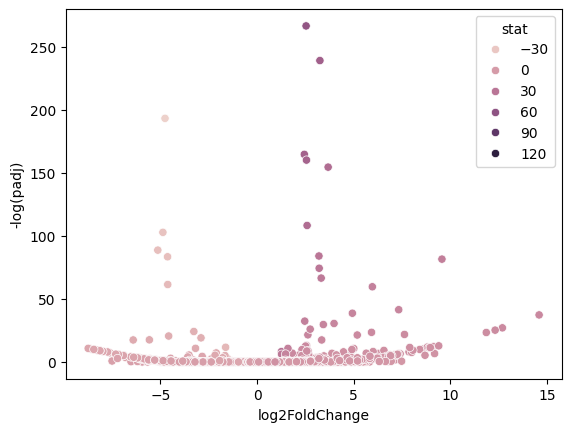

In [101]:
sn.scatterplot( data = squire_indi, x = 'log2FoldChange', y = '-log(padj)', hue= 'stat' )

<Axes: xlabel='stat', ylabel='swScore'>

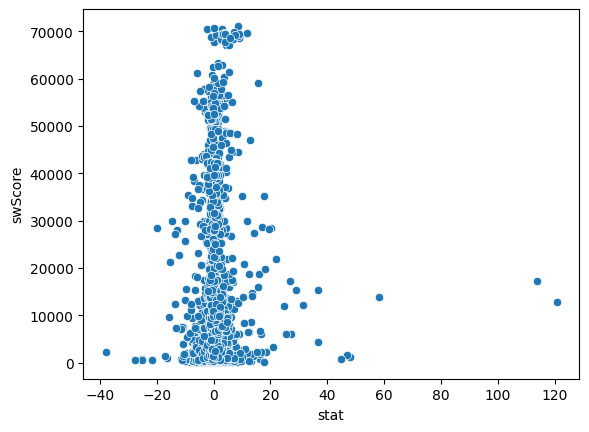

In [104]:
sn.scatterplot( data = squire_indi, x = 'stat', y = 'swScore' )

## Try on all TEs but subsampled

### sub-sample the all deseq df but includes all significant TEs

In [110]:
squire_indi.head()

,TE_ID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,element_type,TE_name,TE_index,...,repClass,genoName,genoStart,genoEnd,strand,df_index_repName,seqLen,genoID,swScore,-log(padj)
11357,chr17|26318143|26318201|Tigger12:TcMar-Tigger:...,6.651258,-0.841285,0.716066,-1.174872,0.592771,1.0,TE,Tigger12:TcMar-Tigger:DNA,Tigger12:TcMar-Tigger:DNA_236,...,DNA,chr17,26318143,26318201,-,11357_Tigger12,58,chr17_26318143_26318201,229,-0.0
6327,chr4|11817737|11817796|Tigger19b:TcMar-Tigger:...,10.586987,-0.203290,0.607192,-0.334804,0.929015,1.0,TE,Tigger19b:TcMar-Tigger:DNA,Tigger19b:TcMar-Tigger:DNA_288,...,DNA,chr4,11817737,11817796,-,6327_Tigger19b,59,chr4_11817737_11817796,189,-0.0
820,chr11|115913825|115913885|MamRTE1:RTE-BovB:LIN...,16.156902,-0.127513,0.402174,-0.317059,0.987502,1.0,TE,MamRTE1:RTE-BovB:LINE,MamRTE1:RTE-BovB:LINE_283,...,LINE,chr11,115913825,115913885,+,820_MamRTE1,60,chr11_115913825_115913885,185,-0.0
7777,"chr11|58498306|58498366|MTD:ERVL-MaLR:LTR|169|+,.",5.234425,0.899249,0.784343,1.146500,0.558834,1.0,TE,MTD:ERVL-MaLR:LTR,MTD:ERVL-MaLR:LTR_169,...,LTR,chr11,58498306,58498366,+,7777_MTD,60,chr11_58498306_58498366,312,-0.0
9814,"chr10|126903390|126903452|ID4_v:ID:SINE|183|+,.",6.713422,0.503397,0.658301,0.764692,0.785880,1.0,TE,ID4_v:ID:SINE,ID4_v:ID:SINE_183,...,SINE,chr10,126903390,126903452,+,9814_ID4_v,62,chr10_126903390_126903452,268,-0.0


In [111]:
significant_indiv = squire_indi[squire_indi['padj'] < 0.05 ]

In [105]:
subsampled_original_squire = squire_indi.sample( frac= 0.5,  )

In [106]:
subsampled_original_squire.shape

(7618, 22)

In [107]:
subsampled_original_squire.columns

Index(['TE_ID', 'baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue',
       'padj', 'element_type', 'TE_name', 'TE_index', 'repName', 'repFamily',
       'repClass', 'genoName', 'genoStart', 'genoEnd', 'strand',
       'df_index_repName', 'seqLen', 'genoID', 'swScore', '-log(padj)'],
      dtype='object')

In [108]:
squire_indi.columns

Index(['TE_ID', 'baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue',
       'padj', 'element_type', 'TE_name', 'TE_index', 'repName', 'repFamily',
       'repClass', 'genoName', 'genoStart', 'genoEnd', 'strand',
       'df_index_repName', 'seqLen', 'genoID', 'swScore', '-log(padj)'],
      dtype='object')

In [112]:
to_add_sig_name = significant_indiv['genoID'][ ~ np.isin( significant_indiv['genoID'] , subsampled_original_squire['genoID'] ) ]

In [115]:
to_add_sig_df = squire_indi[ np.isin( squire_indi['genoID'], to_add_sig_name) ]

In [116]:
to_add_sig_df

,TE_ID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,element_type,TE_name,TE_index,...,repClass,genoName,genoStart,genoEnd,strand,df_index_repName,seqLen,genoID,swScore,-log(padj)
12230,"chrX|102521297|102521374|ID4:ID:SINE|250|+,.",14.603965,7.405525,1.095152,6.762101,2.472917e-09,3.168486e-07,TE,ID4:ID:SINE,ID4:ID:SINE_250,...,SINE,chrX,102521297,102521374,+,12230_ID4,77,chrX_102521297_102521374,320,6.499148
8450,"chr5|73610668|73610748|ID4_v:ID:SINE|288|+,.",10.909253,3.222357,0.636942,5.059103,2.423229e-04,1.555510e-02,TE,ID4_v:ID:SINE,ID4_v:ID:SINE_288,...,SINE,chr5,73610668,73610748,+,8450_ID4_v,80,chr5_73610668_73610748,257,1.808127
6845,"chr2|127475562|127475644|ID:ID:SINE|235|+,.",21.852327,3.057980,0.464875,6.578065,4.778736e-06,4.257179e-04,TE,ID:ID:SINE,ID:ID:SINE_235,...,SINE,chr2,127475562,127475644,+,6845_ID,82,chr2_127475562_127475644,308,3.370878
10479,"chr19|36947610|36947692|B3:B2:SINE|158|+,.",11.473366,-6.896008,1.116162,-6.178322,6.375380e-08,7.194113e-06,TE,B3:B2:SINE,B3:B2:SINE_158,...,SINE,chr19,36947610,36947692,+,10479_B3,82,chr19_36947610_36947692,509,5.143023
5637,chr18|30404413|30404496|RLTR4_MM-int:LTR:LTR|2...,25.849888,3.053860,0.470868,6.485599,6.448054e-06,5.559502e-04,TE,RLTR4_MM-int:LTR:LTR,RLTR4_MM-int:LTR:LTR_207,...,LTR,chr18,30404413,30404496,+,5637_RLTR4_MM-int,83,chr18_30404413_30404496,353,3.254964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11749,chr2|16026046|16033606|RLTR4_MM-int:LTR:LTR|20...,13.083190,5.193054,0.957817,5.421758,5.996488e-06,5.224091e-04,TE,RLTR4_MM-int:LTR:LTR,RLTR4_MM-int:LTR:LTR_20,...,LTR,chr2,16026046,16033606,-,11749_RLTR4_MM-int,7560,chr2_16026046_16033606,67195,3.281989
14398,chr11|102975229|102982789|RLTR4_MM-int:LTR:LTR...,224.357507,4.909009,0.554653,8.850588,9.097518e-13,1.531812e-10,TE,RLTR4_MM-int:LTR:LTR,RLTR4_MM-int:LTR:LTR_21,...,LTR,chr11,102975229,102982789,+,14398_RLTR4_MM-int,7560,chr11_102975229_102982789,68536,9.814794
12024,chr1|131571052|131578612|RLTR4_MM-int:LTR:LTR|...,21.966768,3.247819,0.487474,6.662553,2.002139e-06,1.916333e-04,TE,RLTR4_MM-int:LTR:LTR,RLTR4_MM-int:LTR:LTR_20,...,LTR,chr1,131571052,131578612,+,12024_RLTR4_MM-int,7560,chr1_131571052_131578612,68290,3.717529
7290,chr10|41313340|41320927|RLTR4_MM-int:LTR:LTR|1...,58.328416,9.400975,1.054308,8.916723,8.047890e-16,1.725468e-13,TE,RLTR4_MM-int:LTR:LTR,RLTR4_MM-int:LTR:LTR_15,...,LTR,chr10,41313340,41320927,+,7290_RLTR4_MM-int,7587,chr10_41313340_41320927,69409,12.763093


In [117]:
subsampled_original_squire = pd.concat( [ subsampled_original_squire, to_add_sig_df ] , axis = 0 )

In [118]:
subsampled_original_squire.shape

(7765, 22)

In [124]:
repFam_count = subsampled_original_squire['repFamily'].value_counts()

In [128]:
to_remove_repfam = repFam_count[repFam_count< 6 ].index

In [132]:
repClass_count = subsampled_original_squire['repClass'].value_counts()

In [133]:
repClass_count

repClass
SINE          3668
LTR           2613
LINE          1040
DNA            318
Retroposon      31
rRNA            25
scRNA           23
snRNA            8
Name: count, dtype: int64

In [134]:
to_remove_repClass = repClass_count[repClass_count< 26 ].index

In [135]:
to_remove_repClass

Index(['rRNA', 'scRNA', 'snRNA'], dtype='object', name='repClass')

In [136]:
subsampled_original_squire= subsampled_original_squire[ ~np.isin( subsampled_original_squire['repClass'] , to_remove_repClass) ]

In [170]:
subsampled_original_squire.shape

(7670, 22)

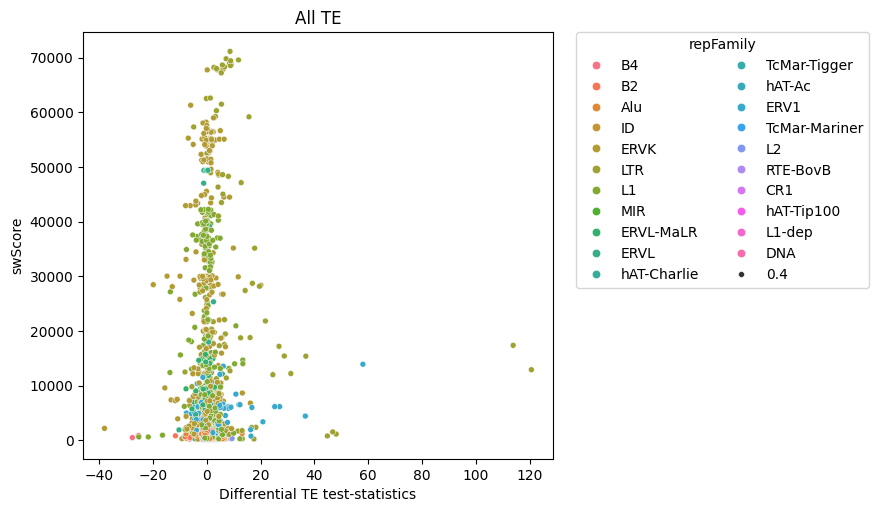

In [162]:
f,a = plt.subplots(figsize = [9,5])
sn.scatterplot( data = subsampled_original_squire, x = 'stat', y = 'swScore', hue = 'repFamily' , size = 0.4, ax = a )
plt.legend( title = 'repFamily', ncols = 2,
    bbox_to_anchor=(1.05, 1),  # x=1.05 pushes it to the right
    loc='upper left',
    borderaxespad=0
)

# Adjust layout to make room for the legend
plt.tight_layout()
plt.title( 'All TE')
plt.xlabel('Differential TE test-statistics') 

# Show the plot
plt.show()

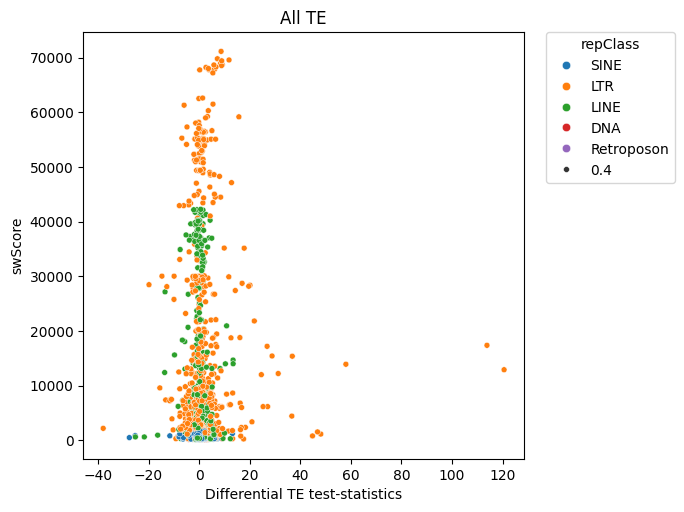

In [183]:
f,a = plt.subplots(figsize = [7,5])
sn.scatterplot( data = subsampled_original_squire, x = 'stat', y = 'swScore', hue = 'repClass' , size = 0.4, ax = a )
plt.legend( title = 'repClass', ncols = 1,
    bbox_to_anchor=(1.05, 1),  # x=1.05 pushes it to the right
    loc='upper left',
    borderaxespad=0
)

# Adjust layout to make room for the legend
plt.tight_layout()
plt.title( 'All TE')
plt.xlabel('Differential TE test-statistics') 

# Show the plot
plt.show()

<Axes: >

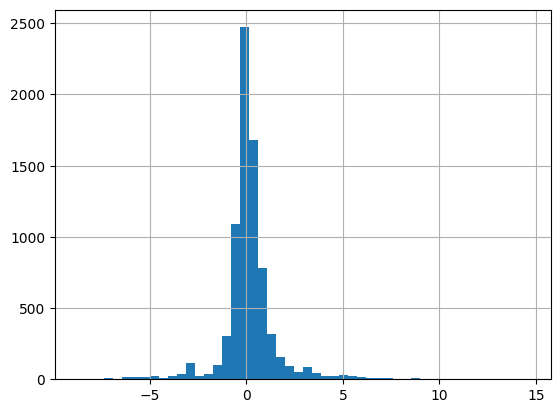

In [139]:
subsampled_original_squire['log2FoldChange'].hist( bins = 50, )

plot based on different repClass

In [140]:
unique_classes = subsampled_original_squire['repClass'].unique()

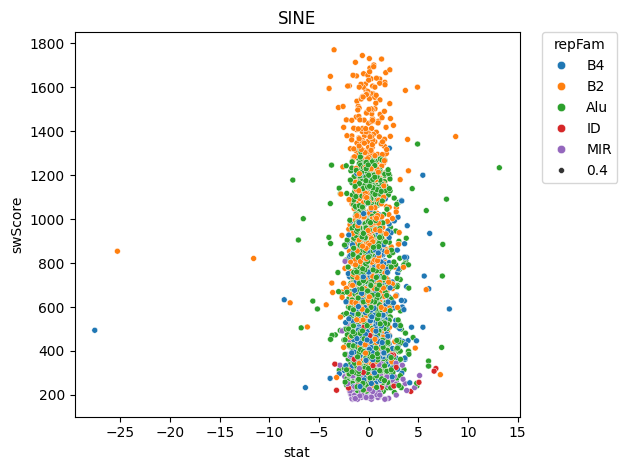

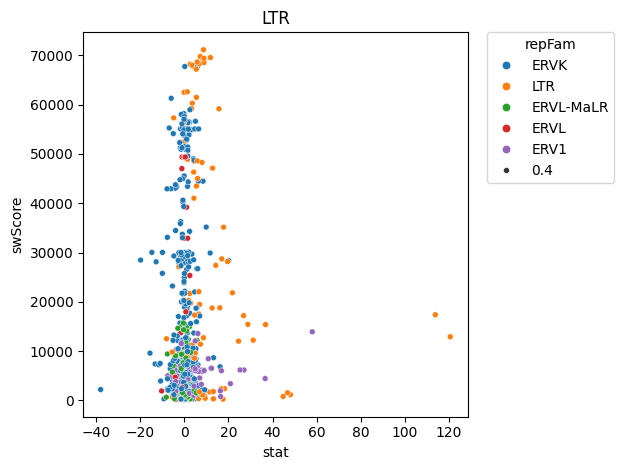

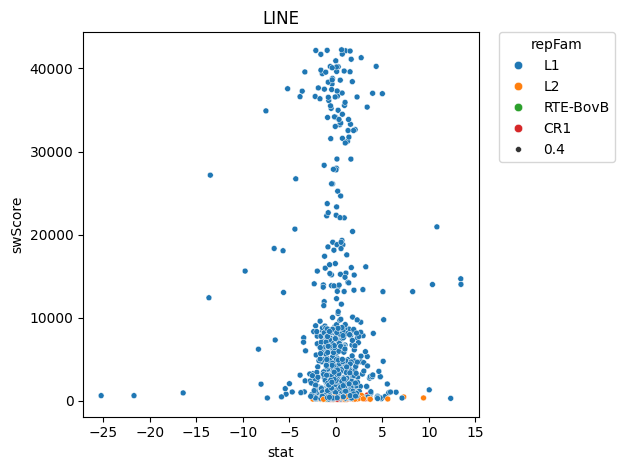

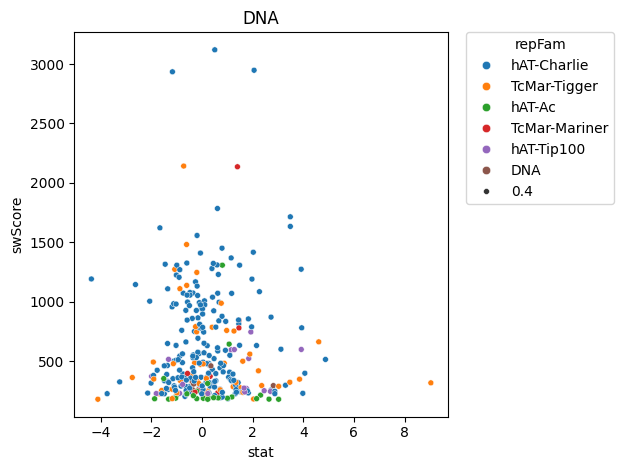

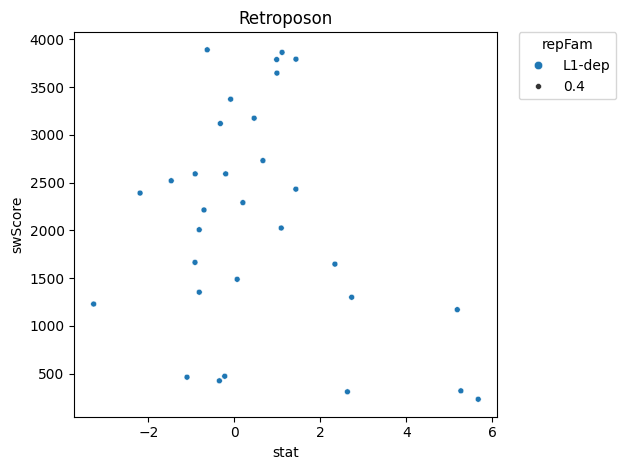

In [163]:
for c in unique_classes:
    plot_df = subsampled_original_squire[ subsampled_original_squire['repClass'] == c ]
    
    f,a = plt.subplots()
    sn.scatterplot( data = plot_df, x = 'stat', y = 'swScore', hue = 'repFamily' , size = 0.4, ax = a )
    plt.legend( title = 'repFam',
        bbox_to_anchor=(1.05, 1),  # x=1.05 pushes it to the right
        loc='upper left',
        borderaxespad=0
    )
    
    # Adjust layout to make room for the legend
    plt.title( c )
    plt.tight_layout()
    
    # Show the plot
    plt.savefig(f"TE_age_plots/scatter_squire_{c}.png")
    plt.show()

#TODO: 
- first, get only LTR, threshold based with |stat| > 2, then compare with barplot and t-test
- then repeat with all classes

## barplots and violin plots with high LFC TEs

In [4]:
#subsampled_original_squire = pd.read_csv("A1_subsampled_orig_dTE_df.csv", header = 0, index_col = 0 )

In [171]:
subsampled_original_squire.head()

,TE_ID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,element_type,TE_name,TE_index,...,repClass,genoName,genoStart,genoEnd,strand,df_index_repName,seqLen,genoID,swScore,-log(padj)
11657,"chr12|83782903|83783026|RSINE1:B4:SINE|287|-,.",20.673008,0.218417,0.378221,0.577485,0.981246,1.000000,TE,RSINE1:B4:SINE,RSINE1:B4:SINE_287,...,SINE,chr12,83782903,83783026,-,11657_RSINE1,123,chr12_83782903_83783026,330,-0.000000
5202,"chr5|24025705|24025884|B2_Mm1a:B2:SINE|22|-,.",4.589470,-2.273693,1.162550,-1.955781,0.139058,1.000000,TE,B2_Mm1a:B2:SINE,B2_Mm1a:B2:SINE_22,...,SINE,chr5,24025705,24025884,-,5202_B2_Mm1a,179,chr5_24025705_24025884,1607,-0.000000
661,"chr2|153110067|153110156|B1_Mur3:Alu:SINE|174|-,.",24.492989,-0.701240,0.323365,-2.168573,0.822233,1.000000,TE,B1_Mur3:Alu:SINE,B1_Mur3:Alu:SINE_174,...,SINE,chr2,153110067,153110156,-,661_B1_Mur3,89,chr2_153110067_153110156,450,-0.000000
9659,"chr2|167141255|167141331|ID4:ID:SINE|250|+,.",25.837142,0.115512,0.342071,0.337683,0.995696,1.000000,TE,ID4:ID:SINE,ID4:ID:SINE_250,...,SINE,chr2,167141255,167141331,+,9659_ID4,76,chr2_167141255_167141331,238,-0.000000
13980,chr12|19863372|19864152|MMERVK9E_I:ERVK:LTR|13...,7.403868,-6.260199,1.153457,-5.427337,0.000003,0.000239,TE,MMERVK9E_I:ERVK:LTR,MMERVK9E_I:ERVK:LTR_130,...,LTR,chr12,19863372,19864152,+,13980_MMERVK9E_I,780,chr12_19863372_19864152,7278,3.620888


In [197]:
high_LFC_df = subsampled_original_squire[ (subsampled_original_squire['log2FoldChange'] > 2) | (subsampled_original_squire['log2FoldChange'] < -2) ] 

In [198]:
high_LFC_df.shape

(743, 22)

In [193]:
high_LFC_df[ (high_LFC_df['stat'] < 10) | (high_LFC_df['stat'] > -10) ]

,TE_ID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,element_type,TE_name,TE_index,...,repClass,genoName,genoStart,genoEnd,strand,df_index_repName,seqLen,genoID,swScore,-log(padj)
13980,chr12|19863372|19864152|MMERVK9E_I:ERVK:LTR|13...,7.403868,-6.260199,1.153457,-5.427337,2.553233e-06,2.393935e-04,TE,MMERVK9E_I:ERVK:LTR,MMERVK9E_I:ERVK:LTR_130,...,LTR,chr12,19863372,19864152,+,13980_MMERVK9E_I,780,chr12_19863372_19864152,7278,3.620888
8033,chr12|69594320|69601879|RLTR4_MM-int:LTR:LTR|2...,42.411247,5.005505,0.547431,9.143620,1.268755e-13,2.358564e-11,TE,RLTR4_MM-int:LTR:LTR,RLTR4_MM-int:LTR:LTR_20,...,LTR,chr12,69594320,69601879,+,8033_RLTR4_MM-int,7559,chr12_69594320_69601879,68687,10.627352
8053,chr7|63777050|63784609|RLTR4_MM-int:LTR:LTR|20...,8.631079,6.645149,2.463419,2.697531,1.192094e-02,4.322180e-01,TE,RLTR4_MM-int:LTR:LTR,RLTR4_MM-int:LTR:LTR_20,...,LTR,chr7,63777050,63784609,+,8053_RLTR4_MM-int,7559,chr7_63777050_63784609,68204,0.364297
64,"chr8|21616692|21623089|L1MdA_III:L1:LINE|27|-,.",7.907836,-6.356060,3.387933,-1.876088,NaN,NaN,TE,L1MdA_III:L1:LINE,L1MdA_III:L1:LINE_27,...,LINE,chr8,21616692,21623089,-,64_L1MdA_III,6397,chr8_21616692_21623089,37662,NaN
8442,"chr7|45123595|45123685|RLTR21:ERVK:LTR|125|+,.",2.902835,-4.912921,1.334174,-3.682370,1.684044e-03,8.344968e-02,TE,RLTR21:ERVK:LTR,RLTR21:ERVK:LTR_125,...,LTR,chr7,45123595,45123685,+,8442_RLTR21,90,chr7_45123595_45123685,366,1.078575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6620,chr11|76440376|76447935|RLTR4_MM-int:LTR:LTR|2...,20.674373,5.843672,0.967197,6.041866,2.750647e-07,2.919499e-05,TE,RLTR4_MM-int:LTR:LTR,RLTR4_MM-int:LTR:LTR_21,...,LTR,chr11,76440376,76447935,+,6620_RLTR4_MM-int,7559,chr11_76440376_76447935,45023,4.534692
10869,chr5|43366024|43373583|RLTR4_MM-int:LTR:LTR|20...,198.413768,7.903013,0.910416,8.680660,1.697914e-14,3.370675e-12,TE,RLTR4_MM-int:LTR:LTR,RLTR4_MM-int:LTR:LTR_20,...,LTR,chr5,43366024,43373583,+,10869_RLTR4_MM-int,7559,chr5_43366024_43373583,71131,11.472283
11749,chr2|16026046|16033606|RLTR4_MM-int:LTR:LTR|20...,13.083190,5.193054,0.957817,5.421758,5.996488e-06,5.224091e-04,TE,RLTR4_MM-int:LTR:LTR,RLTR4_MM-int:LTR:LTR_20,...,LTR,chr2,16026046,16033606,-,11749_RLTR4_MM-int,7560,chr2_16026046_16033606,67195,3.281989
14398,chr11|102975229|102982789|RLTR4_MM-int:LTR:LTR...,224.357507,4.909009,0.554653,8.850588,9.097518e-13,1.531812e-10,TE,RLTR4_MM-int:LTR:LTR,RLTR4_MM-int:LTR:LTR_21,...,LTR,chr11,102975229,102982789,+,14398_RLTR4_MM-int,7560,chr11_102975229_102982789,68536,9.814794


make up and down regulated labels

In [203]:
up_down_label = [ ('UP' if high_LFC_df.loc[i, 'log2FoldChange'] > 0 else 'DOWN') for i in high_LFC_df.index ]

In [204]:
high_LFC_df['fold_change_label'] = up_down_label

/tmp/ipykernel_666230/2563409238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_LFC_df['fold_change_label'] = up_down_label


In [176]:
high_LFC_df.head()

,TE_ID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,element_type,TE_name,TE_index,...,genoName,genoStart,genoEnd,strand,df_index_repName,seqLen,genoID,swScore,-log(padj),fold_change_label
5202,"chr5|24025705|24025884|B2_Mm1a:B2:SINE|22|-,.",4.589470,-2.273693,1.162550,-1.955781,1.390579e-01,1.000000e+00,TE,B2_Mm1a:B2:SINE,B2_Mm1a:B2:SINE_22,...,chr5,24025705,24025884,-,5202_B2_Mm1a,179,chr5_24025705_24025884,1607,-0.000000,DOWN
13980,chr12|19863372|19864152|MMERVK9E_I:ERVK:LTR|13...,7.403868,-6.260199,1.153457,-5.427337,2.553233e-06,2.393935e-04,TE,MMERVK9E_I:ERVK:LTR,MMERVK9E_I:ERVK:LTR_130,...,chr12,19863372,19864152,+,13980_MMERVK9E_I,780,chr12_19863372_19864152,7278,3.620888,DOWN
14014,chr2|138359353|138366786|RLTR4_MM-int:LTR:LTR|...,2.116820,3.815710,1.848659,2.064042,6.845969e-02,1.000000e+00,TE,RLTR4_MM-int:LTR:LTR,RLTR4_MM-int:LTR:LTR_320,...,chr2,138359353,138366786,+,14014_RLTR4_MM-int,7433,chr2_138359353_138366786,9927,-0.000000,UP
8033,chr12|69594320|69601879|RLTR4_MM-int:LTR:LTR|2...,42.411247,5.005505,0.547431,9.143620,1.268755e-13,2.358564e-11,TE,RLTR4_MM-int:LTR:LTR,RLTR4_MM-int:LTR:LTR_20,...,chr12,69594320,69601879,+,8033_RLTR4_MM-int,7559,chr12_69594320_69601879,68687,10.627352,UP
8347,chr15|44518032|44518686|IAPEz-int:ERVK:LTR|107...,1.448115,-3.911594,2.580448,-1.515858,1.580855e-01,1.000000e+00,TE,IAPEz-int:ERVK:LTR,IAPEz-int:ERVK:LTR_107,...,chr15,44518032,44518686,+,8347_IAPEz-int,654,chr15_44518032_44518686,4382,-0.000000,DOWN


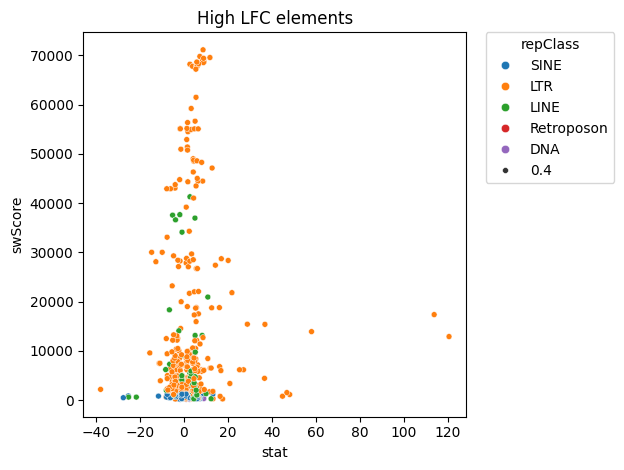

In [199]:
f,a = plt.subplots()
sn.scatterplot( data = high_LFC_df, x = 'stat', y = 'swScore', hue = 'repClass' , size = 0.4, ax = a )
plt.legend( title = 'repClass',
    bbox_to_anchor=(1.05, 1),  # x=1.05 pushes it to the right
    loc='upper left',
    borderaxespad=0
)

# Adjust layout to make room for the legend
plt.title( 'High LFC elements' )

plt.tight_layout()

# Show the plot
#plt.savefig(f"TE_age_plots/scatter_squire_highLFC_all.png")
plt.show()

In [209]:
high_LFC_df['fold_change_label'] = pd.Categorical( high_LFC_df['fold_change_label'], categories = ["UP", "DOWN"] )

/tmp/ipykernel_666230/681454072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_LFC_df['fold_change_label'] = pd.Categorical( high_LFC_df['fold_change_label'], categories = ["UP", "DOWN"] )


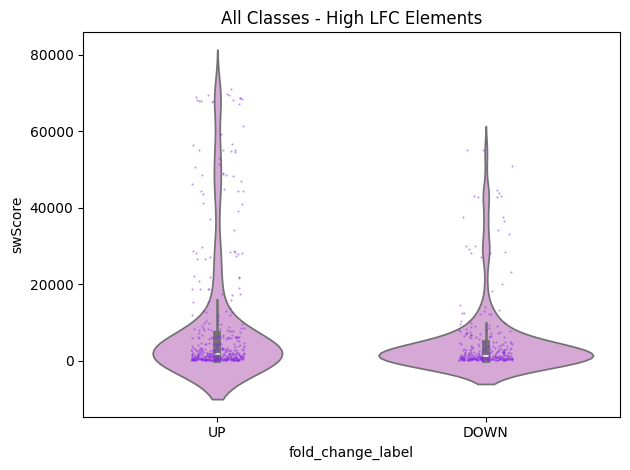

In [166]:
f,a = plt.subplots()

sn.violinplot( data = high_LFC_df, x = 'fold_change_label', y = 'swScore', ax = a, color = 'plum' )
sn.stripplot( data = high_LFC_df, x = 'fold_change_label', y = 'swScore', ax = a, size = 1.5, color = 'blueviolet', alpha = 0.5 )

# plt.legend( title = 'repClass',
#     bbox_to_anchor=(1.05, 1),  # x=1.05 pushes it to the right
#     loc='upper left',
#     borderaxespad=0
# )

# Adjust layout to make room for the legend
plt.title( 'All Classes - High LFC Elements' )
plt.tight_layout()

# Show the plot
plt.savefig(f"TE_age_plots/violin_squire_highLFC_all.png")
plt.show()

In [149]:
# performing t test for the two group
s1 = high_LFC_df[ high_LFC_df[ 'fold_change_label'] == 'UP']['swScore']
s2 = high_LFC_df[ high_LFC_df[ 'fold_change_label'] == 'DOWN']['swScore']

t_statistic, p_value = stats.ttest_ind(s1, s2)

c = 'All TEs'
print( f"{c}: SER UP vs AD up: p = {p_value}, t-stat = {t_statistic}")

All TEs: SER UP vs AD up: p = 9.212356224049372e-05, t-stat = 3.9320513186666273


In [150]:
import matplotlib as mpl

In [151]:
colors = mpl.colormaps['Set2'].colors

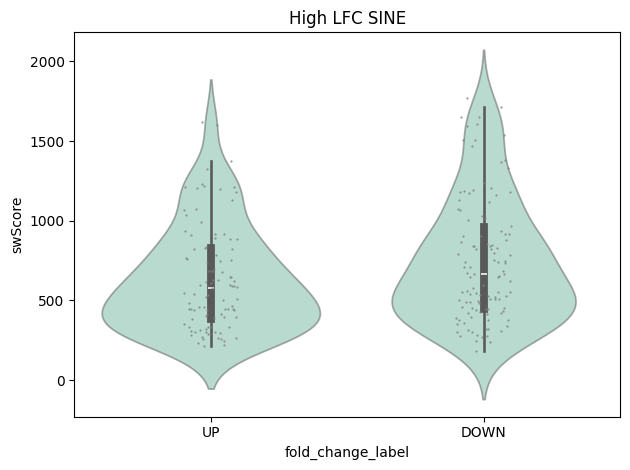

SINE: SER UP vs AD up: p = 0.019302995847135258, t-stat = -2.357705543746666


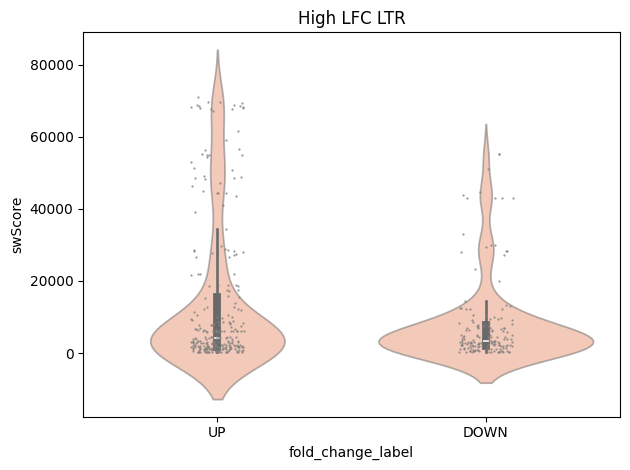

LTR: SER UP vs AD up: p = 0.0009267604934174545, t-stat = 3.3352211359536237


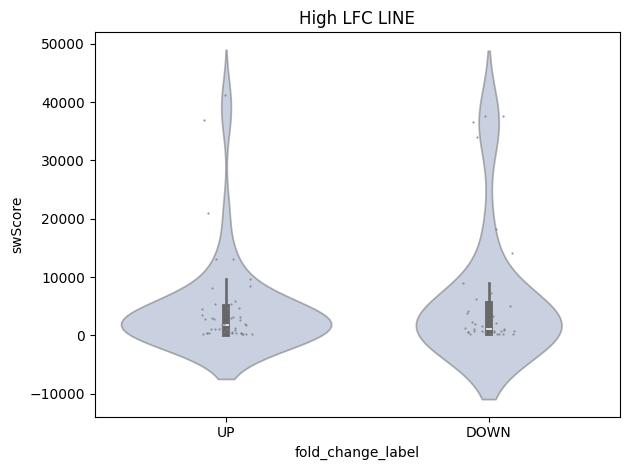

LINE: SER UP vs AD up: p = 0.39619582381145957, t-stat = -0.8529061007828087


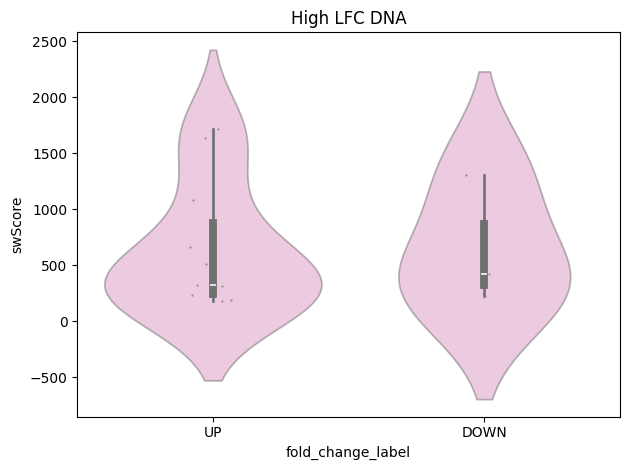

DNA: SER UP vs AD up: p = 0.9844892339091686, t-stat = -0.019850045117451462


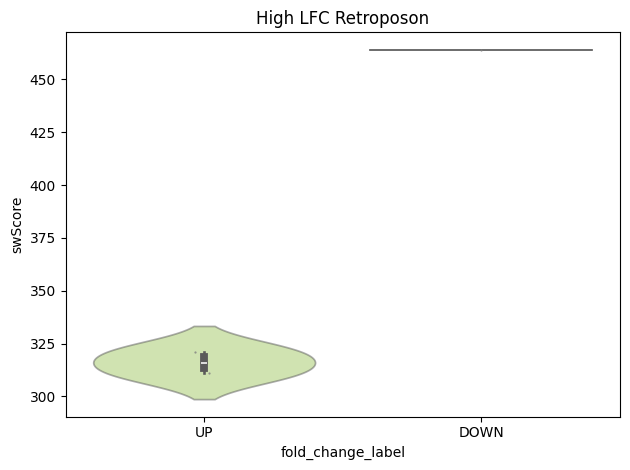

Retroposon: SER UP vs AD up: p = nan, t-stat = nan


/tmp/ipykernel_666230/2022536050.py:29: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = stats.ttest_ind(s1, s2)
/home/lucy/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/home/lucy/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


In [167]:
i = 0
for c in unique_classes:
    plot_df = high_LFC_df[ high_LFC_df['repClass'] == c ]
    
    f,a = plt.subplots()

    sn.violinplot( data = plot_df, x = 'fold_change_label', y = 'swScore', ax = a, color = colors[i], alpha = 0.5)
    sn.stripplot( data = plot_df, x = 'fold_change_label', y = 'swScore', ax = a, size = 1.6, color = 'grey', alpha = 0.8 )
    
    # plt.legend( title = 'repClass',
    #     bbox_to_anchor=(1.05, 1),  # x=1.05 pushes it to the right
    #     loc='upper left',
    #     borderaxespad=0
    # )
    
    # Adjust layout to make room for the legend
    plt.title( 'High LFC ' + c )
    
    plt.tight_layout()
    # Show the plot
    plt.savefig(f"TE_age_plots/violin_squire_highLFC_{c}.png")
    plt.show()
    i+=1 # iterate colors

    # performing t-test
    s1 = plot_df[ plot_df[ 'fold_change_label'] == 'UP']['swScore']
    s2 = plot_df[ plot_df[ 'fold_change_label'] == 'DOWN']['swScore']
    
    t_statistic, p_value = stats.ttest_ind(s1, s2)
    
    print( f"{c}: SER UP vs AD up: p = {p_value}, t-stat = {t_statistic}")
    

/tmp/ipykernel_666230/1013247364.py:10: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0.5}` instead.

  sn.barplot( data = plot_df, x = 'fold_change_label', y = 'swScore', ax = a, color = colors[i], alpha = 0.5, errwidth= 0.5 )


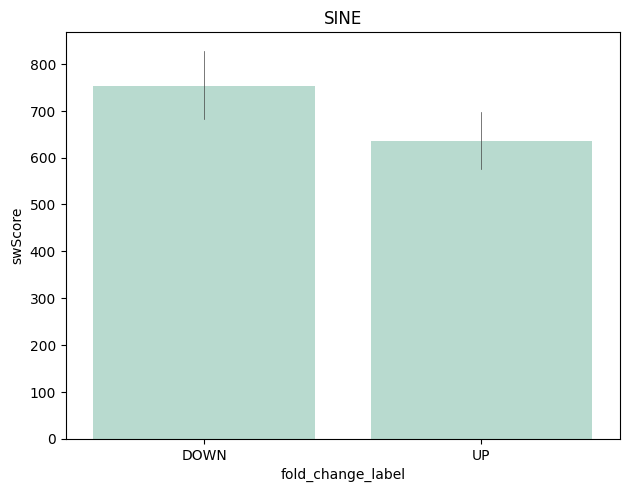

/tmp/ipykernel_666230/1013247364.py:10: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0.5}` instead.

  sn.barplot( data = plot_df, x = 'fold_change_label', y = 'swScore', ax = a, color = colors[i], alpha = 0.5, errwidth= 0.5 )


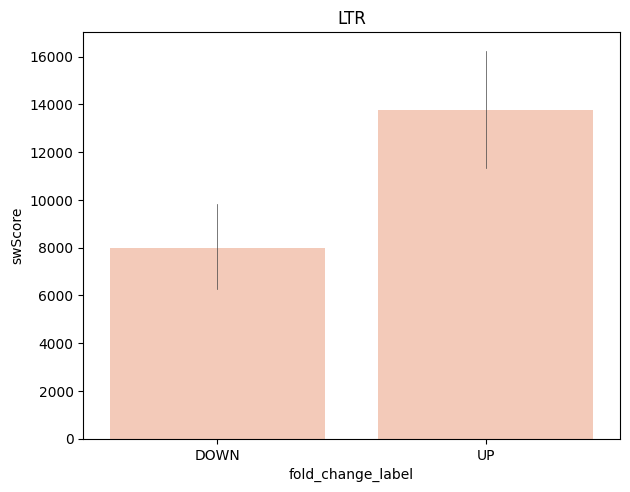

/tmp/ipykernel_666230/1013247364.py:10: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0.5}` instead.

  sn.barplot( data = plot_df, x = 'fold_change_label', y = 'swScore', ax = a, color = colors[i], alpha = 0.5, errwidth= 0.5 )


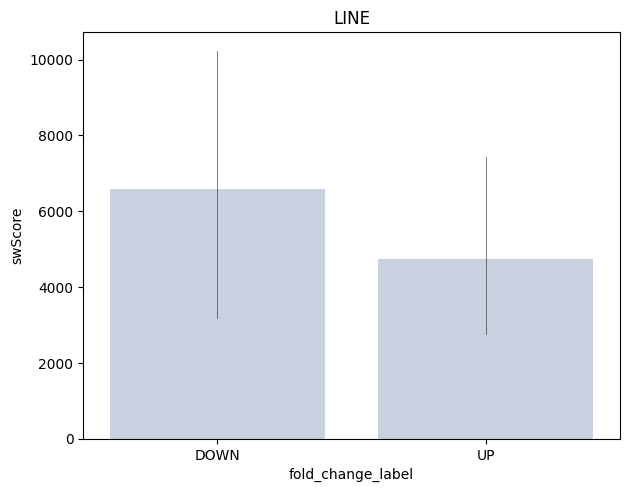

/tmp/ipykernel_666230/1013247364.py:10: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0.5}` instead.

  sn.barplot( data = plot_df, x = 'fold_change_label', y = 'swScore', ax = a, color = colors[i], alpha = 0.5, errwidth= 0.5 )


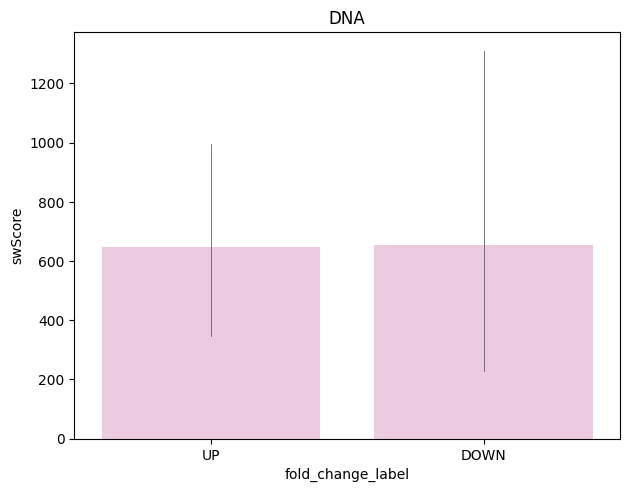

/tmp/ipykernel_666230/1013247364.py:10: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0.5}` instead.

  sn.barplot( data = plot_df, x = 'fold_change_label', y = 'swScore', ax = a, color = colors[i], alpha = 0.5, errwidth= 0.5 )


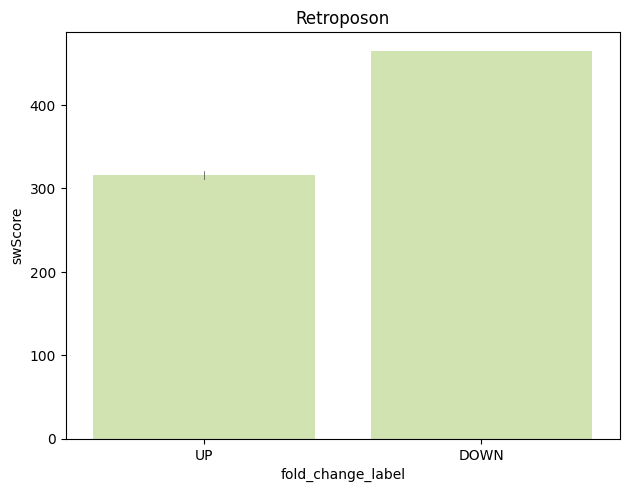

In [154]:
## Barplots visualization

i = 0
for c in unique_classes:
    plot_df = high_LFC_df[ high_LFC_df['repClass'] == c ]
    
    f,a = plt.subplots()

    #sn.violinplot( data = plot_df, x = 'fold_change_label', y = 'swScore', ax = a, color = colors[i], alpha = 0.5)
    sn.barplot( data = plot_df, x = 'fold_change_label', y = 'swScore', ax = a, color = colors[i], alpha = 0.5, errwidth= 0.5 )
    
    # plt.legend( title = 'repClass',
    #     bbox_to_anchor=(1.05, 1),  # x=1.05 pushes it to the right
    #     loc='upper left',
    #     borderaxespad=0
    # )
    
    # Adjust layout to make room for the legend
    plt.tight_layout()
    plt.title( c )
    
    # Show the plot
    plt.show()
    i+=1 # iterate colors
    

## violin plot for LTR repFamilies

In [210]:
LTR_subdf = high_LFC_df[high_LFC_df['repClass'] == 'LTR' ]

In [211]:
unique_families = LTR_subdf['repFamily'].unique()

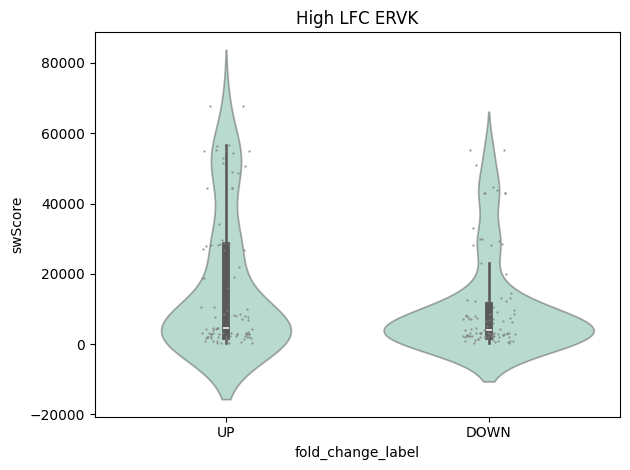

ERVK: SER UP vs AD up: p = 0.015171476381858326, t-stat = 2.4502521225333997


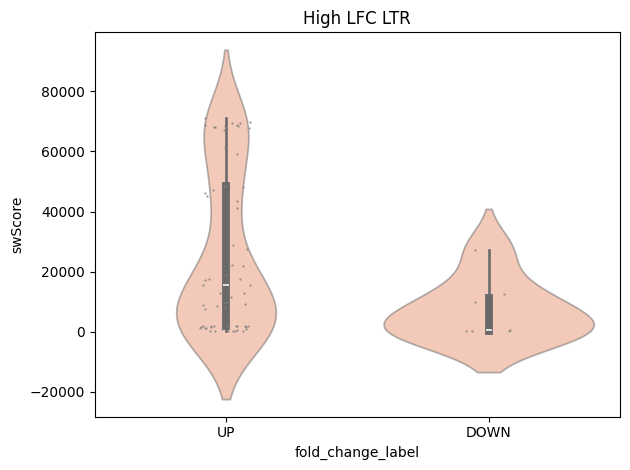

LTR: SER UP vs AD up: p = 0.07269194322902212, t-stat = 1.821082562137661


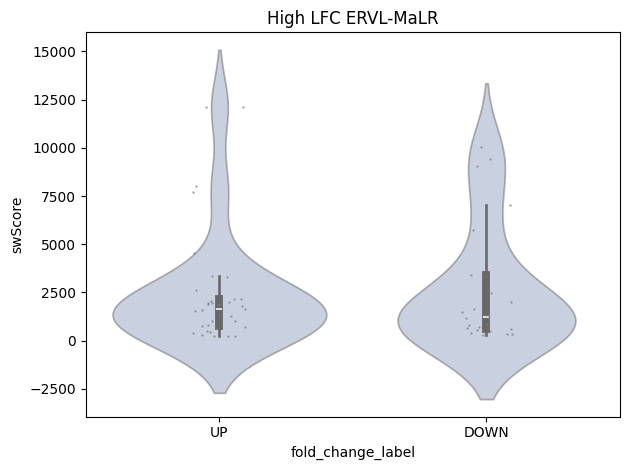

ERVL-MaLR: SER UP vs AD up: p = 0.7976663034911688, t-stat = -0.2575701303449953


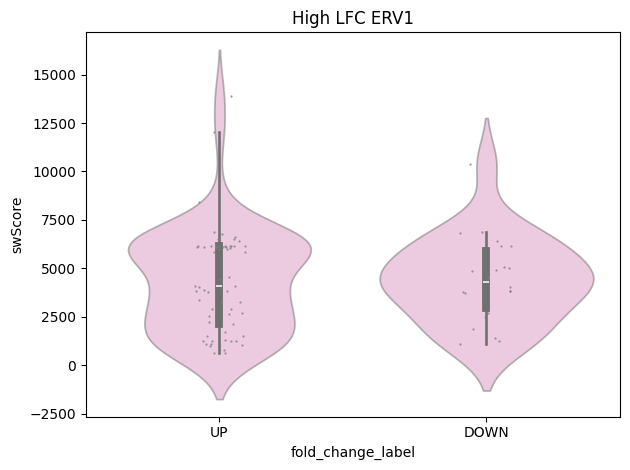

ERV1: SER UP vs AD up: p = 0.9141996623054145, t-stat = -0.10807980696833602


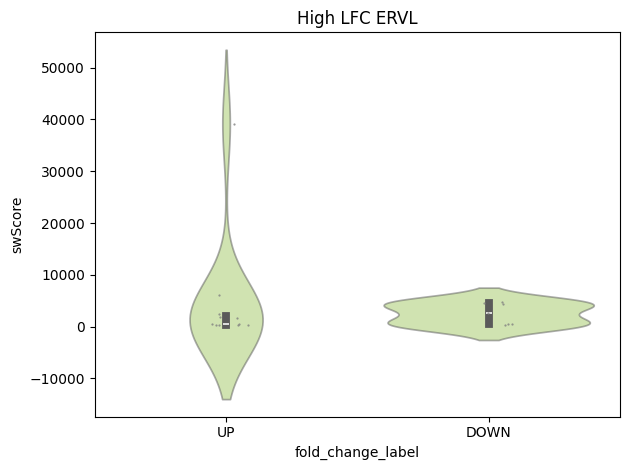

ERVL: SER UP vs AD up: p = 0.6014213897429718, t-stat = 0.532907854977315


In [213]:
i = 0
for c in unique_families:
    plot_df = LTR_subdf[ LTR_subdf['repFamily'] == c ]
    
    f,a = plt.subplots()

    sn.violinplot( data = plot_df, x = 'fold_change_label', y = 'swScore', ax = a, color = colors[i], alpha = 0.5)
    sn.stripplot( data = plot_df, x = 'fold_change_label', y = 'swScore', ax = a, size = 1.6, color = 'grey', alpha = 0.8 )
    
    # plt.legend( title = 'repClass',
    #     bbox_to_anchor=(1.05, 1),  # x=1.05 pushes it to the right
    #     loc='upper left',
    #     borderaxespad=0
    # )
    
    # Adjust layout to make room for the legend
    plt.title( 'High LFC ' + c )
    
    plt.tight_layout()
    # Show the plot
    plt.savefig(f"TE_age_plots/violin_squire_highLFC_LTR_{c}.png")
    plt.show()
    i+=1 # iterate colors

    # performing t-test
    s1 = plot_df[ plot_df[ 'fold_change_label'] == 'UP']['swScore']
    s2 = plot_df[ plot_df[ 'fold_change_label'] == 'DOWN']['swScore']
    
    t_statistic, p_value = stats.ttest_ind(s1, s2)
    
    print( f"{c}: SER UP vs AD up: p = {p_value}, t-stat = {t_statistic}")
    

## save data

In [178]:
subsampled_original_squire.to_csv("A1_subsampled_squire_dTE_df.csv", header = True, index = True )

In [179]:
logi.columns

Index(['count_table_indiv.csv', 'count_table_subF.csv', 'mm39_rmsk_full.tsv',
       'Deseq_indiv_locus_results.csv', 'genoLoc_Deseq_indiv_locus_result.csv',
       'compare_dTE_overlap/', 'genoLoc_TCPS_Deseq_indiv_locus_result.csv',
       'TCPS_all_Deseq_indiv_locus.csv', 'resampled_TCPS_all_TE_indi.csv',
       'TCPS_seq_similarity_summary_df.csv',
       'squire_tjp2_mut_seq_similarity_summary_df.csv',
       'squire_tjp2_wt_seq_similarity_summary_df.csv',
       'squire_tjp2_total_seq_similarity_summary_df.csv',
       'mouse_human_combined_similarity_suammry_df.csv',
       'squire_tjp2_total_seq_similarity_grouped_repClass_summary_df.csv',
       'TCPS_total_seq_similarity_grouped_repClass_summary_df.csv',
       'squire_all_Deseq_indiv_locus.csv', 'resampled_squire_all_TE_indi.csv',
       'squire_total_seq_similarity_repClassGrped_rvcmp_summary_df.csv',
       'TCPS_total_seq_similarity_repClassGrped_rvcmp_summary_df.csv'],
      dtype='object')

In [83]:
rmsk_df.to_csv("./mm39_rmsk_full.tsv", header = True, index = True )

In [180]:
print( logi.loc['explain', 'mm39_rmsk_full.tsv'] )

In nb1, added the column of transcript_id, which is the ID used to run individual locus for telescope. In nb A1b, added genoID, which is obtained from str join the genome location columns


In [77]:
logi.loc['explain', 'mm39_rmsk_full.tsv'] = 'In nb1, added the column of transcript_id, which is the ID used to run individual locus for telescope. In nb A1b, added genoID, which is obtained from str join the genome location columns'

In [78]:
logi.index

Index(['nb_created', 'nb_updated', 'explain'], dtype='object')

In [80]:
logi.loc['nb_updated', 'mm39_rmsk_full.tsv'] = 'A1b'

In [81]:
logi.to_csv("./OUTPUT_EXPLAIN.csv", header = True, index = True )